# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install pakages

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 

In [3]:
!pip install transformers

In [4]:
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.0 MB/s eta 0:00:00


In [5]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 45.9 MB/s eta 0:00:00


In [6]:
!pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [7]:
!pip install accelerate -U

# Import Libraries

In [8]:
import datasets
from datasets import Dataset, Audio
import numpy as np
import pandas as pd
import gc
from sklearn.model_selection import train_test_split
from transformers import WhisperFeatureExtractor, WhisperTokenizer, WhisperProcessor

import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

import evaluate

# Dataset Load

In [9]:
## we will load the both of the data here.
train_df = pd.read_csv("/content/drive/MyDrive/NoakhaliDatasetCSV/Dataset4276.csv")
test_df = pd.read_csv("/content/drive/MyDrive/NoakhaliDatasetCSV/TestCSVFile.csv")

train_df = train_df[['audio', 'Noakhali_text']]
test_df = test_df[['audio', 'Noakhali_text']]

## convert the pandas dataframes to dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

## convert the sample rate of every audio files using cast_column function
train_dataset = train_dataset.cast_column("audio", Audio(sampling_rate=16000))
test_dataset = test_dataset.cast_column("audio", Audio(sampling_rate=16000))

In [ ]:
# from sklearn.model_selection import train_test_split
# import datasets

# trainset, dummy = train_test_split(
#     dataset,
#     test_size=0.2
# )
# valset, testset = train_test_split(
#     dummy,
#     test_size=0.08
# )

# print(len(trainset))
# print(len(valset))
# print(len(testset))

# Feature Extractor

In [10]:
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")
tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-small", language="Bengali", task="transcribe")

processor = WhisperProcessor.from_pretrained("openai/whisper-small", language="Bengali", task="transcribe")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [11]:
def prepare_dataset(examples):
    # compute log-Mel input features from input audio array
    audio = examples["audio"]
    examples["input_features"] = feature_extractor(
        audio["array"], sampling_rate=16000).input_features[0]
    del examples["audio"]
    sentences = examples["Noakhali_text"]

    # encode target text to label ids
    examples["labels"] = tokenizer(sentences).input_ids
    del examples["Noakhali_text"]
    return examples

In [12]:
train_dataset = train_dataset.map(prepare_dataset, num_proc=1)
test_dataset = test_dataset.map(prepare_dataset, num_proc=1)

Map:   0%|          | 0/4276 [00:00<?, ? examples/s]

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

In [13]:
@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": feature["input_features"]} for feature in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

In [14]:
import evaluate

cer_metric = evaluate.load("cer")
wer_metric = evaluate.load("wer")

In [15]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions
    # Decode predictions
    pred_str = processor.batch_decode(preds, skip_special_tokens=True)
    # Decode labels
    label_str = processor.batch_decode(labels, skip_special_tokens=True)
    # Compute CER and WER
    cer = cer_metric.compute(predictions=pred_str, references=label_str)
    wer = wer_metric.compute(predictions=pred_str, references=label_str)
    return {"cer": cer, "wer": wer}

# Load Model

In [17]:
# Load a Pre-Trained Checkpoint
from transformers import WhisperForConditionalGeneration
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

In [18]:
# model.config.forced_decoder_ids = None
# model.config.suppress_tokens = []
model.generation_config.language = "bengali"
model.generation_config.task = "transcribe"

model.generation_config.forced_decoder_ids = None

# Train Model

In [19]:
training_args = Seq2SeqTrainingArguments(
    output_dir="/content/drive/MyDrive/Noakhali_WhisperTrain",  # change to a repo name of your choice
    per_device_train_batch_size=16,
    gradient_accumulation_steps=1,  # increase by 2x for every 2x decrease in batch size
    learning_rate=1e-5,
    warmup_steps=50,
    max_steps=2500,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=8,
    predict_with_generate=True,
    generation_max_length=225,
    save_steps=500,
    eval_steps=500,
    logging_steps=2,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    push_to_hub=False,
)


trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=processor.feature_extractor,
)

## start the model training
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
max_steps is given, it will override any value given in num_train_epochs
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
`use_cache = True` is incompatible with gradient checkpointing. Setting `use_cache = False`...


Step,Training Loss,Validation Loss,Cer,Wer
500,0.343400,0.264862,0.232322,0.579216
1000,0.189500,0.136914,0.149433,0.367121


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint

Step,Training Loss,Validation Loss,Cer,Wer
500,0.343400,0.264862,0.232322,0.579216
1000,0.189500,0.136914,0.149433,0.367121
1500,0.074600,0.057268,0.073215,0.197615
2000,0.027400,0.017934,0.034023,0.075809
2500,0.010300,0.009605,0.020013,0.040034


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint

TrainOutput(global_step=2500, training_loss=0.20886218843385576, metrics={'train_runtime': 5463.3975, 'train_samples_per_second': 7.321, 'train_steps_per_second': 0.458, 'total_flos': 1.151224878956544e+19, 'train_loss': 0.20886218843385576, 'epoch': 9.328358208955224})

In [20]:
from transformers import AutoModelForSeq2SeqLM

# Save the model
model.save_pretrained("/content/drive/MyDrive/asr_4thjune/Noakhali_whisperASR-finetuned.pt")

# Save the tokenizer
tokenizer.save_pretrained("/content/drive/MyDrive/asr_4thjune/Noakhali_whisperASR-finetuned.json")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}


('/content/drive/MyDrive/asr_4thjune/Noakhali_whisperASR-finetuned.json/tokenizer_config.json',
 '/content/drive/MyDrive/asr_4thjune/Noakhali_whisperASR-finetuned.json/special_tokens_map.json',
 '/content/drive/MyDrive/asr_4thjune/Noakhali_whisperASR-finetuned.json/vocab.json',
 '/content/drive/MyDrive/asr_4thjune/Noakhali_whisperASR-finetuned.json/merges.txt',
 '/content/drive/MyDrive/asr_4thjune/Noakhali_whisperASR-finetuned.json/normalizer.json',
 '/content/drive/MyDrive/asr_4thjune/Noakhali_whisperASR-finetuned.json/added_tokens.json')

# Results

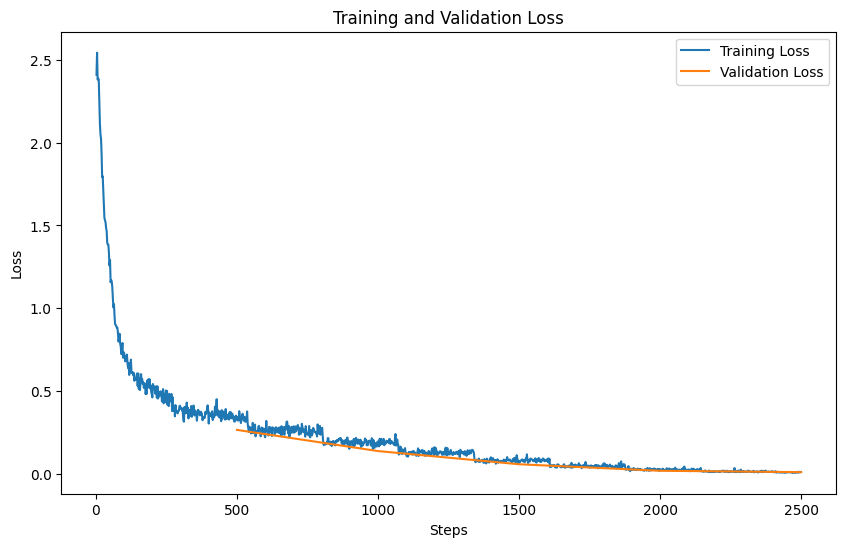

In [21]:
import os
import json
import matplotlib.pyplot as plt

# Extract the training logs
logs = trainer.state.log_history

# Separate steps and loss values
train_loss_values = []
eval_loss_values = []
train_steps = []
eval_steps = []

for log in logs:
    if 'loss' in log:
        train_loss_values.append(log['loss'])
        train_steps.append(log['step'])
    if 'eval_loss' in log:
        eval_loss_values.append(log['eval_loss'])
        eval_steps.append(log['step'])

# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_steps, train_loss_values, label='Training Loss')
plt.plot(eval_steps, eval_loss_values, label='Validation Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [22]:
# Generate predictions
predictions = trainer.predict(test_dataset)

# Decode the predictions
pred_str = processor.batch_decode(predictions.predictions, skip_special_tokens=True)

# Optionally, decode the references to compare
label_str = processor.batch_decode(predictions.label_ids, skip_special_tokens=True)

# Print the predictions
for i, pred in enumerate(pred_str):
    print(f"Reference {i+1}: {label_str[i]}")
    print(f"Prediction {i+1}: {pred}")

Reference 1: ভাই হইলা আই আইবিএর লাই ট্রাই কইচ্ছি বুইযজেন নি ঢাকা ইউনিভার্সিটির আইবিএ
Prediction 1: ভাই হইলা আই আইবিএর লাই ট্রাই কইচ্ছি বুইযজেন নি ঢাকা ইউনিভার্সিটির আইবিএ
Reference 2: ইয়ানের লাই ট্রাই কইচ্ছিলাম আই সাইন্সের তুন হইচ্ছি আল্লাহর রহমতে
Prediction 2: ইয়ানের লাই ট্রাই কইচ্ছিলাম আই সাইন্সের তুন হইচ্ছি আল্লাহর রহমতে
Reference 3: সাইন্সের তুন ভাল রেজাল্ট কইচ্ছি করার হরে দেই অন আই
Prediction 3: সাইন্সের তুন ভাল রেজাল্ট কইচ্ছি করার হরে দেই অন আই
Reference 4: মানি সবসময় আর একটা স্বপ্ন আছিল আরকি যে ঢাকা ইউনিভার্সিটির আইবিএর মইদ্ধে ভরতি হইম
Prediction 4: মানি সবসময় আর একটা স্বপ্ন আছিল আরকি যে ঢাকা ইউনিভার্সিটির আইবিএর মইদ্ধে ভরতি হইম
Reference 5: অন এডার লাই আই সাইন্সের সব ছারি আর আব্বা মেডিকেলের মইদ্ধে মেডীকেলের প্রিপারেশনের লাই
Prediction 5: অন এডার লাই আই সাইন্সের সব ছারি আর আব্বা মেডিকেলের মইদ্ধে মেডীকেলের প্রিপারেশনের লাই
Reference 6: উন্মেশের মইদ্ধে ভরতি করাইছে আই হেই উন্মাশের প্রিপারেশন হিয়ান্তা কদ্দুর লইছি কদ্দুর
Prediction 6: উন্মেশের মইদ্ধে ভরতি করাইছে আই হেই উন্মাশের প্রিপ